## Part 1: PCA Algorithm

In [38]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

In [39]:
dataSet=pd.read_csv("./input_data/intrusionDetection.csv")

In [40]:
label=dataSet['xAttack']
dataSet=dataSet.drop(['xAttack'],axis=1)
print("Dimensions before PCA: ",dataSet.shape)

Dimensions before PCA:  (24998, 29)


In [41]:
mean=np.mean(dataSet)
SD=np.std(dataSet)

In [42]:
normData=(dataSet-mean)/SD

In [43]:
Covariance=np.cov(normData.T)

In [44]:
eigValues,eigVectors=LA.eig(Covariance)

In [45]:
valToVect=dict(zip(eigValues,eigVectors))

In [46]:
sortedEigValues=sorted(eigValues,reverse=True)

In [47]:
tol=0
PCAList=[]
for item in sortedEigValues:
    tol+=(item/sum(sortedEigValues))
    PCAList.append(item)
    if tol>=0.9:
        break

In [48]:
ans=np.dot(normData,np.asarray([valToVect[item] for item in PCAList]).T)
print("Dimensions after PCA: ",ans.shape)

Dimensions after PCA:  (24998, 14)


## Part2: K-Means Clustering

In [76]:
from copy import deepcopy
clustersCount=5
rows=len(ans)
cols=len(ans[0])

In [77]:
means=np.mean(ans,axis=0)
stds=np.std(ans,axis=0)

In [78]:
newCenters=np.random.randn(clustersCount,cols)*stds+means
oldCenters=np.zeros(newCenters.shape)

distances=np.zeros((rows,clustersCount))

clusters=np.zeros(rows)

margin=LA.norm(newCenters-oldCenters)

while margin!=0:
    for i in range(clustersCount):
        distances[:,i]=LA.norm(ans-newCenters[i],axis=1)
    clusters=np.argmin(distances,axis=1)
    oldCenters=deepcopy(newCenters)
    for i in range(clustersCount):
        newCenters[i]=np.mean(ans[clusters==i],axis=0)
    margin=LA.norm(newCenters-oldCenters)

In [83]:
uniqueLabel=np.unique(label).tolist()
assignedLabel=[uniqueLabel.index(x) for x in label.tolist()]

In [95]:
from sklearn.metrics.cluster import contingency_matrix
CMatrix=contingency_matrix(clusters,assignedLabel)
print("Contingency Matrix is: ")
CMatrix

Contingency Matrix is: 


array([[ 133, 5709,  852,  120,    7],
       [ 439,  599,    0,    0,    0],
       [6788,   52,   92,    1,    0],
       [ 390, 6826,  387,   14,    3],
       [1364,  178,  982,   62,    0]])

In [96]:
for idx,val in enumerate(CMatrix):
    print("Purity of Cluster: ",idx," :",max(val)*100/sum(val))
KMeansPurity=sum([max(item) for item in CMatrix])/rows
print("K-means purity: ",KMeansPurity)

Purity of Cluster:  0  : 83.69740507257
Purity of Cluster:  1  : 57.70712909441233
Purity of Cluster:  2  : 97.90855329583152
Purity of Cluster:  3  : 89.58005249343832
Purity of Cluster:  4  : 52.74555297757154
K-means purity:  0.851508120649652


## Part 3: Gaussian Mixture Model (GMM)

In [87]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(n_components=5).fit(ans)
gmmlabel=GMM.predict(ans)

In [97]:
CMatrix=contingency_matrix(gmmlabel,assignedLabel)
print("Contingency Matrix is: ")
CMatrix

Contingency Matrix is: 


array([[1444, 3118,  361,   39,    1],
       [ 131, 9058,  900,   85,    3],
       [1359,   10,  948,    0,    0],
       [  71, 1178,  103,   73,    6],
       [6109,    0,    1,    0,    0]])

In [98]:
for idx,val in enumerate(CMatrix):
    print("Purity of Cluster: ",idx," :",max(val)*100/sum(val))
GMMPurity=sum([max(item) for item in CMatrix])/rows
print("GMM purity: ",GMMPurity)

Purity of Cluster:  0  : 62.82490429175902
Purity of Cluster:  1  : 89.00461825685369
Purity of Cluster:  2  : 58.653431160984034
Purity of Cluster:  3  : 82.32005590496156
Purity of Cluster:  4  : 99.9836333878887
GMM purity:  0.8329466357308585


## Part 4: Hierarchical Clustering

In [90]:
from sklearn.cluster import AgglomerativeClustering
HCluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
hLabels=HCluster.fit_predict(ans)

In [99]:
CMatrix=contingency_matrix(hLabels,assignedLabel)
print("Contingency Matrix is: ")
CMatrix

Contingency Matrix is: 


array([[    0,     6,     0,     0,     0],
       [ 9114, 13356,  2312,   197,    10],
       [    0,     1,     0,     0,     0],
       [    0,     1,     0,     0,     0],
       [    0,     0,     1,     0,     0]])

In [100]:
for idx,val in enumerate(CMatrix):
    print("Purity of Cluster: ",idx," :",max(val)*100/sum(val))
HPurity=sum([max(item) for item in CMatrix])/rows
print("Hierarchical purity: ",HPurity)

Purity of Cluster:  0  : 100.0
Purity of Cluster:  1  : 53.44751690743927
Purity of Cluster:  2  : 100.0
Purity of Cluster:  3  : 100.0
Purity of Cluster:  4  : 100.0
Hierarchical purity:  0.5346427714217138


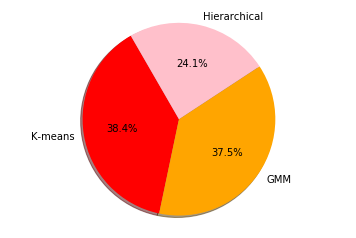

In [101]:
import matplotlib.pyplot as plt
slices_hours=[KMeansPurity,GMMPurity,HPurity]
Algorithms=['K-means','GMM','Hierarchical']
colors=['red','orange','pink']
fig1,ax1=plt.subplots()
ax1.pie(slices_hours,colors=colors,labels=Algorithms,autopct='%1.1f%%',shadow=True,startangle=120)
ax1.axis('equal')
plt.show()

## Part 5: PCA on Categorical Data

We should not use PCA for categorical dataset because it involves Projection, CoVariance and Eigen Values matrices which are not possible for categorical data. Specially CoVariance can only be calculated for numerical data. For example a value of "YES" and "NO" would not have any significance in a covariance matrix and hence we can not continue the PCA algorithm for dimensionality reduction.